In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("input"))

['test.csv', 'train.csv']


<a id="1"></a> <br>
## 1- READ DATA

In [ ]:
data=pd.read_csv("input/train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Dataset as 21 features and 2000 entries.
The meanings of the features are given below.

**battery_power: ** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front  Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In the following table, first 10 entries are shown.

<a id="2"></a> <br>
## 2- DATA ANALYSIS


#### CORRELATION BETWEEN FEATURES

Following heatmap shows correlation values between features.

Text(0.5, 1.0, 'Correlation ')

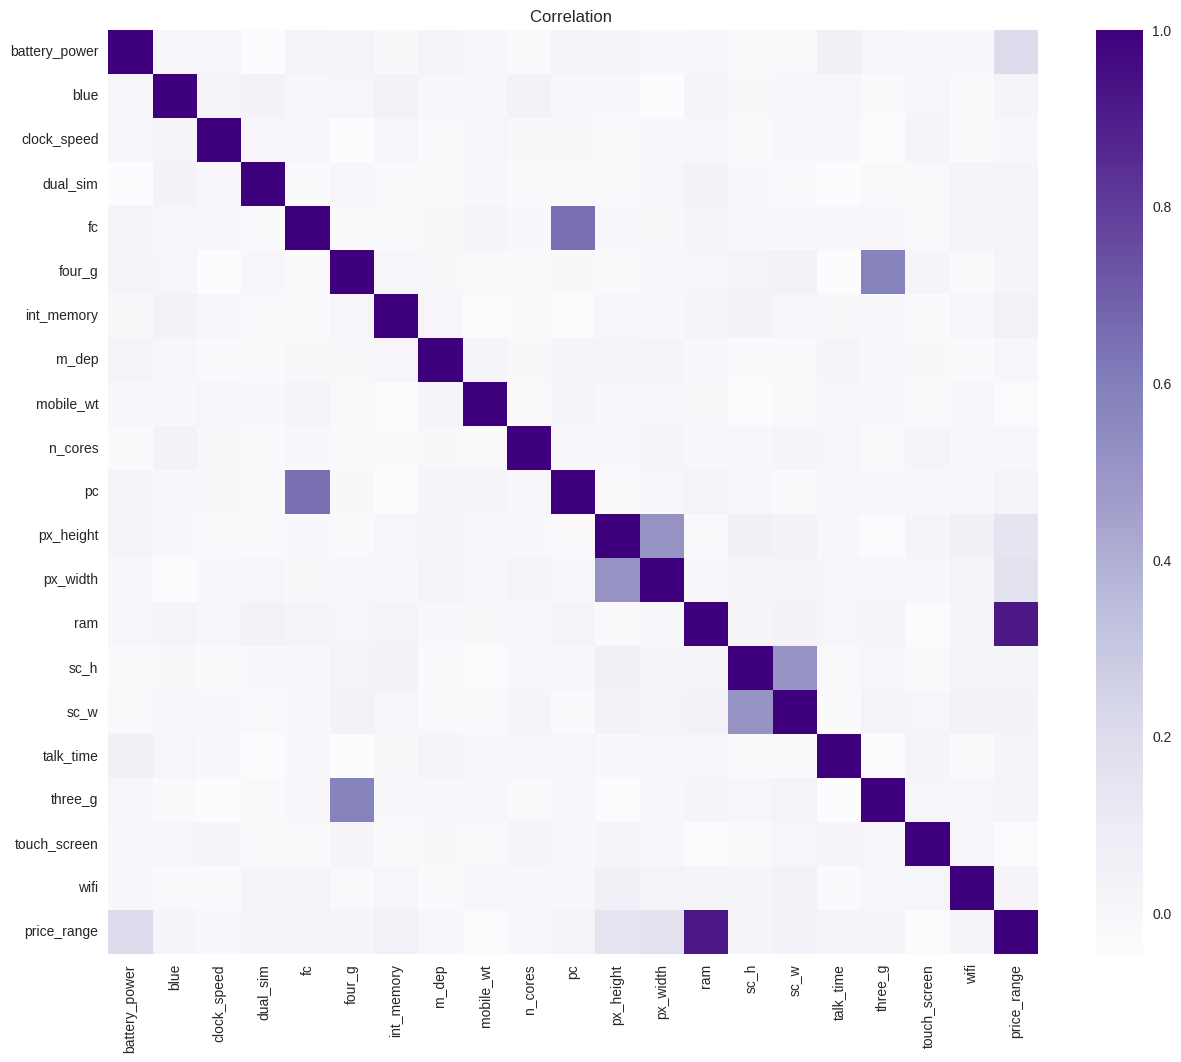

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

As we can see our target price range has highly positive correlation between ram.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example 	as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.


Now lets see correlation values price range and other features.

In [ ]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Price range and RAM have about 0.91 correlation. Because of that I compared ram and other features with price range with Altair, Seaborn and Plotly libraries.

<a id="4"></a> <br>
#### 1- PRICE RANGE AND RAM

Following histogram shows distribution of ram values according to price range.

* In 0 class(low cost) Ram values are changing between 0- 2000 megabytes

* In 1 class(medium cost) Ram values are changing between 0-3000 megabytes

* In 2 class(high cost) Ram values are changing between 1000-4000 mb

* In 3 class(very high cost) Ram values are changing between 2000 and 4000 mb( mostly 3500-4000 mb)

Following distibution plots show dual sim or not and ram values according to price range.

0- has not dual ,
1- has wifi

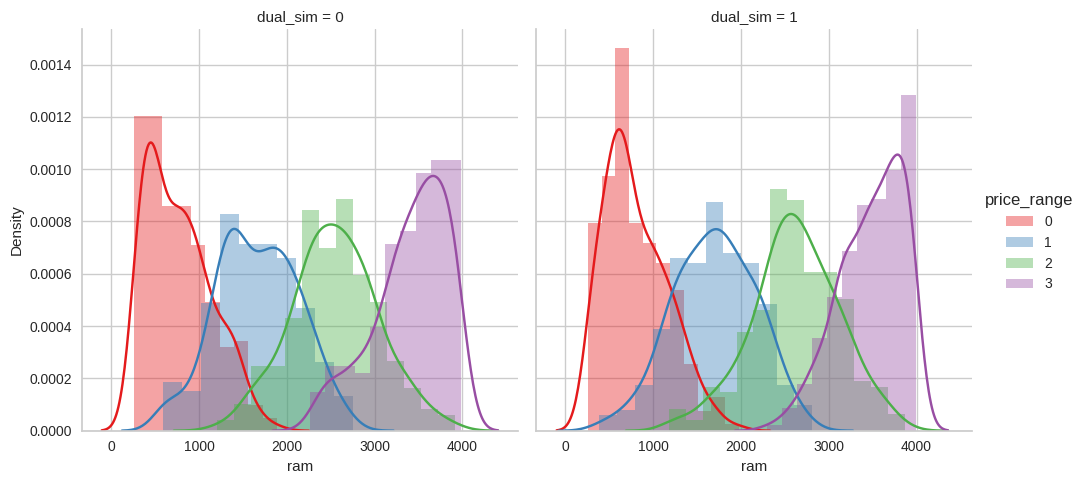

In [ ]:
g = sns.FacetGrid(data, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())


<a id="19"></a> <br>
## 3- SUPPORT MACHINE VECTOR(SVM) ALGORITHM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.  

source=(https://scikit-learn.org/stable/modules/svm.html)

for detail

(https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)

(https://www.ijcai.org/Proceedings/13/Papers/221.pdf)   

(https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners)
                


#### TRAIN AND TEST SPLIT

In [ ]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

<a id="20"></a> <br>
#### Class Balance Visualization

After applying train- test split let's check how the classes are splitted.

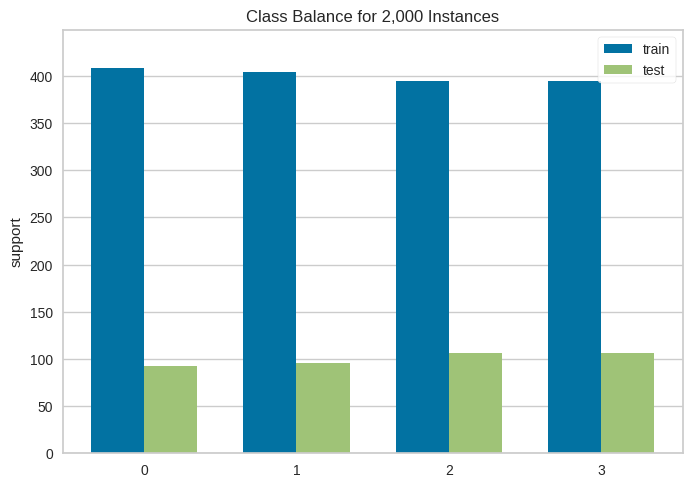

<Axes: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

All number of classes are about the same.

<a id="21"></a> <br>
#### FIRST MODEL

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97125
test accuracy: 0.8375


After applying sklearn library,first model has 0.91 train accuracy and 0.84 test accuracy.

But how can we increase these scores? Firstly let's reduce unnecessary features to improve estimators’ accuracy scores then apply gridsearch method.

<a id="22"></a> <br>
#### FEATURE SELECTION

SelectKBest:  removes all but the  highest scoring features

For classification generally these methods are used: chi2, f_classif, mutual_info_classif

**chi2:** Computes chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

**f_classif:** Compute the ANOVA F-value for the provided sample.

**mutual_info_classif:** Estimates mutual information for a discrete target variable. Mutual information (MI)  between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.


source= https://scikit-learn.org/stable/modules/feature_selection.html


I used f_classif method to determine best features

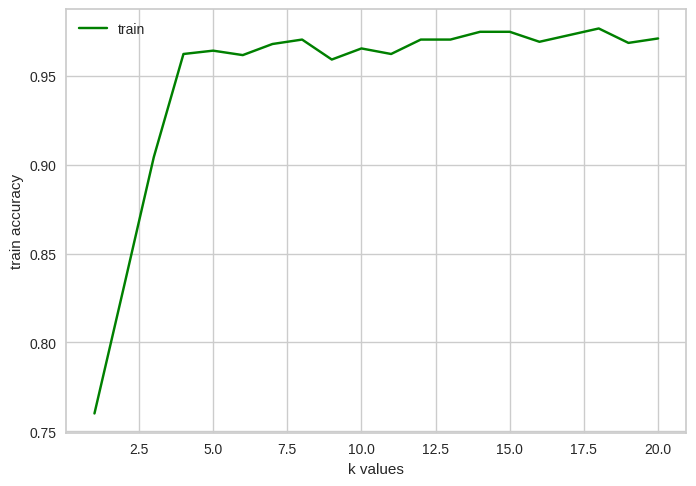

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))

plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()



In the graph above, we can see 4 or 5 features gives higher train accuracies.

In [ ]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.976875
max accuracy id: 17


In [ ]:
print(" max accuracy values: \n", df.iloc[4])

 max accuracy values: 
 best features number    5.000000
train_score             0.964375
Name: 4, dtype: float64


I used 5 features because it has the highest accuracy.

Now let's determine our features:

In [ ]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


Both train and test data, feature names are battery_power, int_memory,px_height, px_width and ram.

<a id="23"></a> <br>
#### MODEL WITH GRIDSEARCHCV

To apply svm algorithm firstly I used GridSearchCV method to tune parameters. Some parameters are given below.

In [ ]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]


In [ ]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9637499999999999
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


After applying GridSearch we have best parameters as C:2, decision_function_shape: "ovo", gamma: "auto" and kernel:"linear".

<a id="24"></a> <br>
#### CV SCORES

**StratifiedKFold:** Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

Following barchart shows Cross Validation Scores for SVC with 10 fold. And average mean score is 0.957


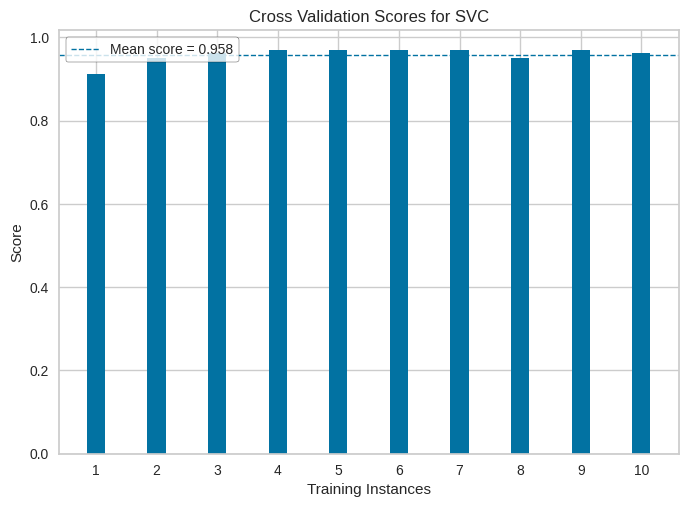

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()


<a id="25"></a> <br>
#### BUILDING MODEL

No lets build the model with the best parameters we have found with the Gridsearch method.

In [ ]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)


In [ ]:
svm_model.fit(x_new,y_train)

SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [ ]:
print("train_accuracy:",svm_model.score(x_new,y_train, ))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.964375
test_accuracy:  0.9375


Our model has 0.96 train accuracy and 0.93 test accuracy. Now check that with confusion matrix.

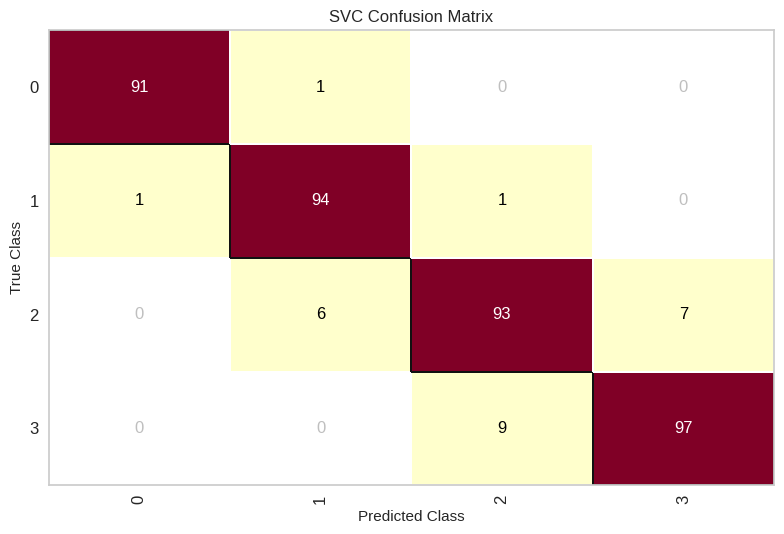

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

According to confusion matrix model knows yellow boxes wrong.

<a id="26"></a> <br>
## 4- PREDICTION VISUALIZATION

In [ ]:
y_pred=svm_model.predict(x_new_test)

In [ ]:
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]

In [ ]:
svm_test["y_true"]=y_test
svm_test["y_pred"]=y_pred

In [ ]:
svm_test.head()

,battery_power,int_memory,px_height,px_width,ram,y_true,y_pred
674,0.356045,0.693548,0.092857,0.529372,0.190540,0,0
1699,0.334669,0.693548,0.483673,0.338451,0.261358,0,0
1282,0.072144,0.129032,0.057653,0.683578,0.440673,1,1
1315,0.674015,0.483871,0.491327,0.680908,0.159808,1,1
1210,0.203073,0.903226,0.041327,0.696929,0.839391,2,2


Following graphs shows ram and battery power features according to true values and predicted values. If you select an area you can see the differences. For example:

Example1:
![](https://i.ibb.co/GcLVcz6/1.png)

Example2
![](https://i.ibb.co/VxKdqH0/2.png)

##### Thank you for your interest. I would be happy to hear your comments to improve my self-development!!